In [60]:
import os
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
import keras.models as Models
import keras.optimizers as Optimizers
import keras.layers as Layers
import keras.metrics as Metrics
import tensorflow.keras.activations as Activations
import tensorflow.keras.utils as Utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from random import randint

In [2]:
def read_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for label_name in os.listdir(directory):
        if label_name=='Covid':
            label=0
        elif label_name=='Normal':
            label=1
        elif label_name=='Viral Pneumonia':
            label=2
            
        for file in os.listdir(directory + label_name):
            image = cv2.imread(directory + label_name + '/' + file)
            image = cv2.resize(image, (150, 150))
            
            Images.append(image)
            Labels.append(label)
    return shuffle(Images, Labels, random_state=246810)

def get_label(label_id):
    labels = {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}
    
    return labels[label_id]


In [3]:
Images, Labels = read_images('../Covid19-dataset/train/')

In [4]:
Images = np.array(Images)
Labels = np.array(Labels)

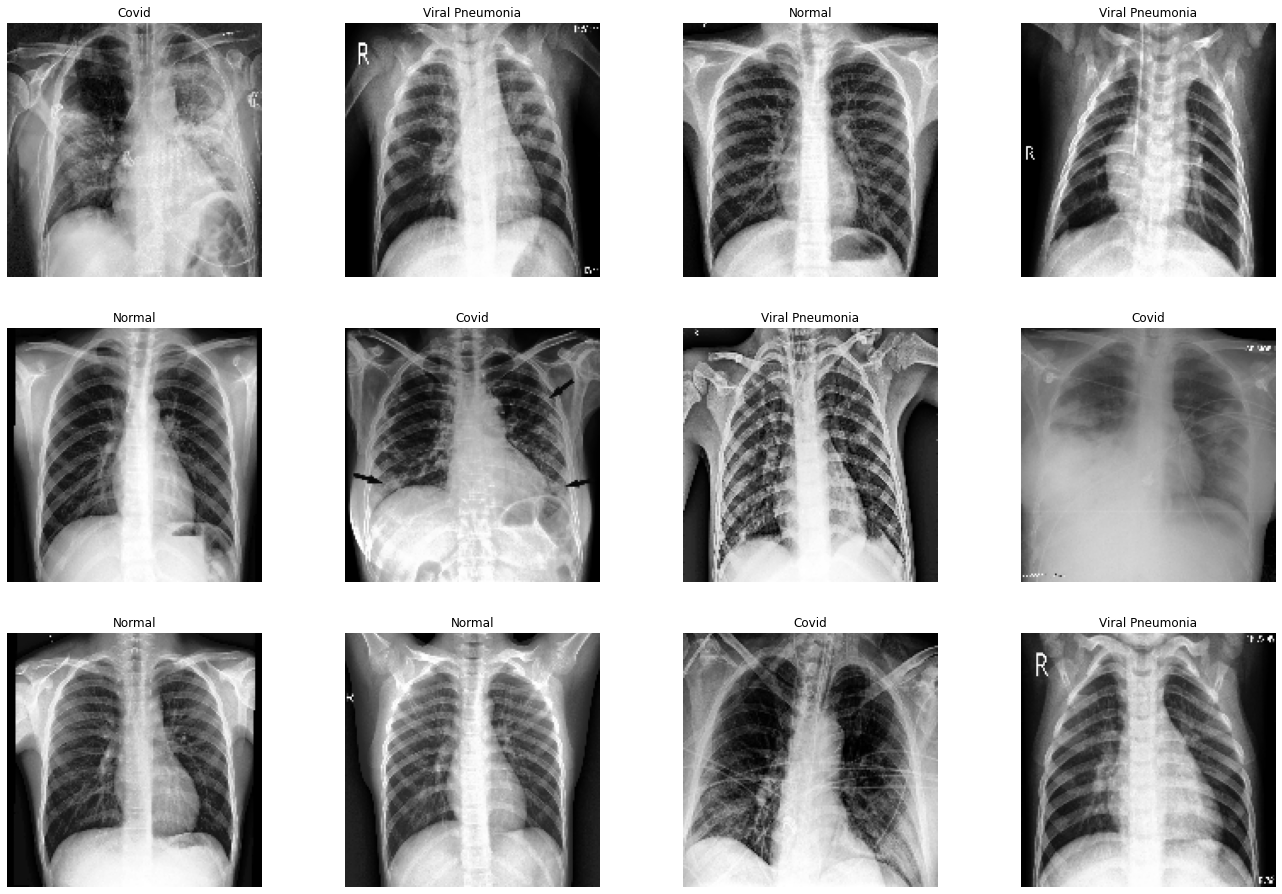

In [5]:
f, ax = plot.subplots(3, 4)
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,4,1):
        rnd_number = randint(0, len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_label(Labels[rnd_number]))
        ax[i,j].axis('off')

In [6]:
Images.shape

(251, 150, 150, 3)

In [58]:
Images_test, Labels_test = read_images('../Covid19-dataset/test/')

In [59]:
Images_test = np.array(Images_test)
Labels_test = np.array(Labels_test)

In [183]:
model = Models.Sequential()
model.add(Layers.Conv2D(30, 3, activation = 'relu', input_shape = (150, 150, 3)))
model.add(Layers.MaxPool2D(3,3))
model.add(Layers.Conv2D(60, 3, activation = 'relu'))
# model.add(Layers.Conv2D(120, 3, activation = 'relu'))
model.add(Layers.MaxPool2D(3, 3))
model.add(Layers.Flatten())
# model.add(Layers.Dense(120, activation = 'relu'))
model.add(Layers.Dense(60, activation = 'relu'))
model.add(Layers.Dense(30, activation = 'relu'))
model.add(Layers.Dropout(0.5))
model.add(Layers.Dense(3, activation = 'sigmoid'))
model.compile(metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 148, 148, 30)      840       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 49, 49, 30)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 47, 47, 60)        16260     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 15, 15, 60)        0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 13500)             0         
_________________________________________________________________
dense_141 (Dense)            (None, 60)                810060    
_________________________________________________________________
dense_142 (Dense)            (None, 30)              

In [184]:
trained = model.fit(Images, Labels, validation_split=0.20, epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 38ms/step - loss: 46.5204 - accuracy: 0.3713 - val_loss: 10.5191 - val_accuracy: 0.4510
Epoch 2/30
7/7 [==============================] - 0s 14ms/step - loss: 7.3265 - accuracy: 0.3819 - val_loss: 1.2777 - val_accuracy: 0.6863
Epoch 3/30
7/7 [==============================] - 0s 14ms/step - loss: 1.3435 - accuracy: 0.6615 - val_loss: 0.5663 - val_accuracy: 0.7451
Epoch 4/30
7/7 [==============================] - 0s 14ms/step - loss: 0.6845 - accuracy: 0.6874 - val_loss: 0.6719 - val_accuracy: 0.7647
Epoch 5/30
7/7 [==============================] - 0s 15ms/step - loss: 0.5935 - accuracy: 0.7462 - val_loss: 0.5917 - val_accuracy: 0.8235
Epoch 6/30
7/7 [==============================] - 0s 14ms/step - loss: 0.5357 - accuracy: 0.8083 - val_loss: 0.5155 - val_accuracy: 0.8431
Epoch 7/30
7/7 [==============================] - 0s 15ms/step - loss: 0.4029 - accuracy: 0.8307 - val_loss: 0.5904 - val_accuracy: 0.8039
Epoch 8/30
7/7 [=========

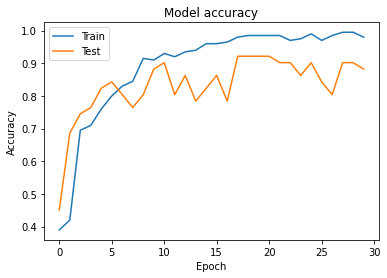

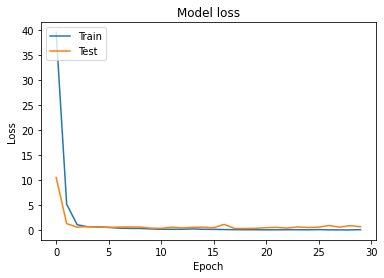

In [185]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


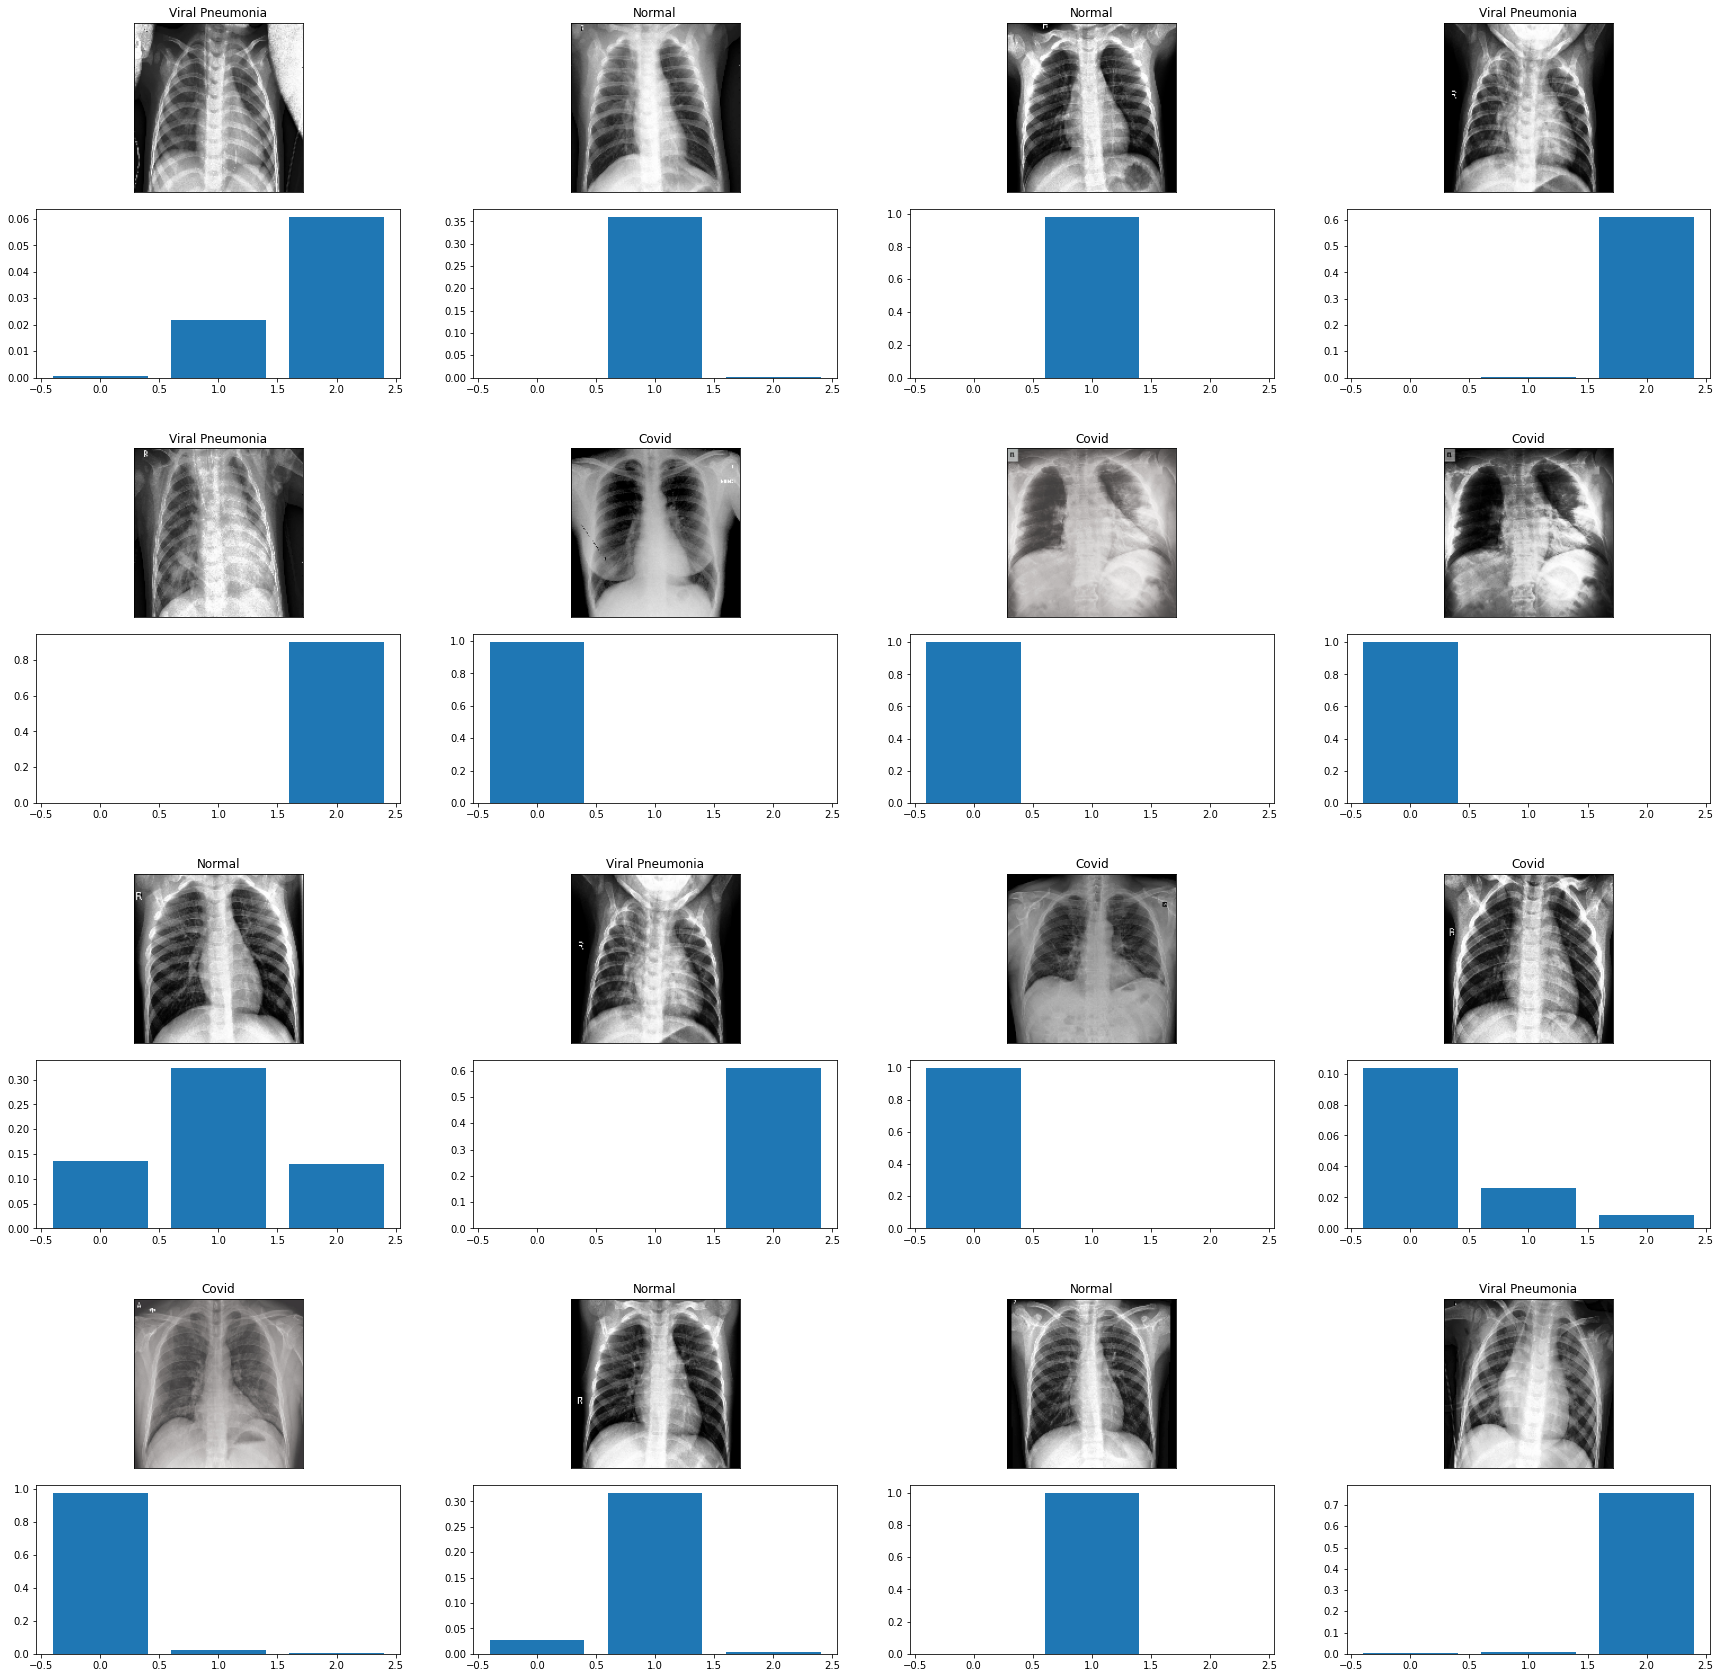

In [186]:
import matplotlib.gridspec as gridspec

fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)

for i in range(16):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(Images_test)-1)
    pred_image = np.array([Images_test[rnd_number]])
    pred_class = get_label(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(3)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [187]:
Labels_pred = model.predict(Images_test)

In [188]:
Labels_pred = np.argmax(Labels_pred, axis=1)

In [189]:
print(classification_report(Labels_test, Labels_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       0.75      0.90      0.82        20
           2       0.93      0.70      0.80        20

    accuracy                           0.88        66
   macro avg       0.88      0.87      0.87        66
weighted avg       0.89      0.88      0.88        66

